## Transfers Capstone - Features Creation

Follow along with the rest of the notebooks from this project here: https://github.com/tdraths/transfers_capstone/tree/main/notebooks.

In this notebook, I create features I'll use to model a club team's performance improvements based on their activities during the transfer window.

### I. Packages & Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

transfers_path = '/home/tdraths/sb_assignments/Transfers_Capstone/data/data_cleaning_outputs/transfers_best.csv'
spi_path = '/home/tdraths/sb_assignments/Transfers_Capstone/data/data_cleaning_outputs/spi_best.csv'

transfers = pd.read_csv(transfers_path)
spi = pd.read_csv(spi_path)

In [2]:
# Checking columns
display(transfers.columns)
spi.columns

Index(['Unnamed: 0', 'club_name', 'team_short', 'player_name', 'age',
       'position', 'club_involved_name', 'transfer_movement', 'fee_cleaned',
       'league_name', 'year', 'season'],
      dtype='object')

Index(['Unnamed: 0', 'season', 'date', 'league_id', 'league', 'team1',
       'team1_short', 'team2', 'team2_short', 'spi1', 'spi2'],
      dtype='object')

In [3]:
# Dropping 'Unnamed: 0'
transfers.drop(columns=['Unnamed: 0'], inplace=True)
spi.drop(columns=['Unnamed: 0'], inplace=True)

display(transfers.head(3))
spi.head(3)

,club_name,team_short,player_name,age,position,club_involved_name,transfer_movement,fee_cleaned,league_name,year,season
0,Arsenal FC,ARS,Thomas,27,Defensive Midfield,Atlético Madrid,in,45.0,Premier League,2020,2020/2021
1,Arsenal FC,ARS,Gabriel,22,Centre-Back,LOSC Lille,in,23.4,Premier League,2020,2020/2021
2,Arsenal FC,ARS,Pablo Marí,26,Centre-Back,Flamengo,in,7.2,Premier League,2020,2020/2021


,season,date,league_id,league,team1,team1_short,team2,team2_short,spi1,spi2
0,2017,2017-08-04,2412,English League Championship,Sunderland,SUN,Derby County,DER,50.39,40.83
1,2017,2017-08-04,2412,English League Championship,Nottingham Forest,NOT,Millwall,MIL,35.55,28.23
2,2017,2017-08-05,2412,English League Championship,Sheffield United,SHU,Brentford,BRE,27.72,39.70


### II. Working with the SPI DataFrame
 - As a reminder, the SPI dataframe shows the season, date, league_id, league, team names and team spis for games in the English Premier and English Championship Leagues
 - spi1 is the **SPI score for 'team 1'**, which I'll call 'home team'.
 - spi2 is the **SPI score for 'team2'**, which I'll call 'away team'.
 
__GOALS:__ 
 - Create a data frame that shows the 'home' and 'away' spi scores for each team listed in dataframe.
 - Create columns that show the average home, average away, and season average SPI score for each team per year.

In [4]:
spi_home = spi[['season', 'league', 'team1', 'team1_short', 'spi1']]
spi_away = spi[['season', 'league', 'team2', 'team2_short', 'spi2']]

display(spi.head(3))
display(spi_home.head(3))
spi_away.head(3)

,season,date,league_id,league,team1,team1_short,team2,team2_short,spi1,spi2
0,2017,2017-08-04,2412,English League Championship,Sunderland,SUN,Derby County,DER,50.39,40.83
1,2017,2017-08-04,2412,English League Championship,Nottingham Forest,NOT,Millwall,MIL,35.55,28.23
2,2017,2017-08-05,2412,English League Championship,Sheffield United,SHU,Brentford,BRE,27.72,39.70


,season,league,team1,team1_short,spi1
0,2017,English League Championship,Sunderland,SUN,50.39
1,2017,English League Championship,Nottingham Forest,NOT,35.55
2,2017,English League Championship,Sheffield United,SHU,27.72


,season,league,team2,team2_short,spi2
0,2017,English League Championship,Derby County,DER,40.83
1,2017,English League Championship,Millwall,MIL,28.23
2,2017,English League Championship,Brentford,BRE,39.70


In [5]:
# Create SPI_HOME and look at the wide range of avg_home_spi between the top PL clubs and the not-top ECL clubs

spi_home = spi_home.groupby(['season', 'league', 'team1', 'team1_short'],
                           as_index=False).mean().loc[:, ['season', 'league', 'team1', 'team1_short', 'spi1']]

spi_home.columns = ['year', 'league', 'team name', 'team', 'avg_home_spi']

spi_home[spi_home['year'] == 2018].sort_values(by=['avg_home_spi'], ascending=False).head(3)

,year,league,team name,team,avg_home_spi
76,2018,Barclays Premier League,Manchester City,MNC,93.550000
75,2018,Barclays Premier League,Liverpool,LIV,91.810000
69,2018,Barclays Premier League,Chelsea,CHE,85.693158


In [6]:
# Create SPI_AWAY and look at the wide range of avg_away_spi between the top PL clubs and the not-top ECL clubs

spi_away = spi_away.groupby(['season', 'league', 'team2', 'team2_short'],
                           as_index=False).mean().loc[:, ['season', 'league', 'team2', 'team2_short', 'spi2']]

spi_away.columns = ['year', 'league', 'team name', 'team', 'avg_away_spi']

spi_away[spi_away['year'] == 2018].sort_values(by=['avg_away_spi'], ascending=False).head(3)

,year,league,team name,team,avg_away_spi
76,2018,Barclays Premier League,Manchester City,MNC,93.579474
75,2018,Barclays Premier League,Liverpool,LIV,91.626316
69,2018,Barclays Premier League,Chelsea,CHE,85.461053


In [7]:
spi = spi_home.merge(spi_away, how='inner', on=['year', 'team name', 'team', 'league'])
spi.head()

,year,league,team name,team,avg_home_spi,avg_away_spi
0,2016,Barclays Premier League,AFC Bournemouth,BOU,60.945789,60.804211
1,2016,Barclays Premier League,Arsenal,ARS,82.174211,81.785789
2,2016,Barclays Premier League,Burnley,BUR,57.487368,57.947895
3,2016,Barclays Premier League,Chelsea,CHE,84.546842,84.528421
4,2016,Barclays Premier League,Crystal Palace,CRY,58.646842,58.364737


In [8]:
# Create an Average SPI column to show the averagee per club per year
spi['avg_spi_score'] = round((spi['avg_home_spi'] + spi['avg_away_spi']) / 2, 2)
spi.head()

,year,league,team name,team,avg_home_spi,avg_away_spi,avg_spi_score
0,2016,Barclays Premier League,AFC Bournemouth,BOU,60.945789,60.804211,60.88
1,2016,Barclays Premier League,Arsenal,ARS,82.174211,81.785789,81.98
2,2016,Barclays Premier League,Burnley,BUR,57.487368,57.947895,57.72
3,2016,Barclays Premier League,Chelsea,CHE,84.546842,84.528421,84.54
4,2016,Barclays Premier League,Crystal Palace,CRY,58.646842,58.364737,58.51


In [9]:
# Check for any null values in the dataframe
spi.isna().sum()

year             0
league           0
team name        0
team             0
avg_home_spi     0
avg_away_spi     0
avg_spi_score    0
dtype: int64

In [10]:
# I have different values in this 'league' column than what I want to use. These are a bit wordy
display(spi.league.value_counts())

# Goingt to fix these to match the 'transfers' dataframe
transfers.league_name.value_counts()

Barclays Premier League        100
English League Championship     96
Name: league, dtype: int64

Championship      5002
Premier League    3453
Name: league_name, dtype: int64

In [11]:
spi.league.replace({'Barclays Premier League': 'Premier League',
                    'English League Championship': 'Championship'},inplace=True)
display(spi.league.unique())
transfers.league_name.unique()


array(['Premier League', 'Championship'], dtype=object)

array(['Premier League', 'Championship'], dtype=object)

##### What's happened so far:
 - I took the spi dataframe and subset it into two new dataframes, spi_home and spi_away
 - Each new one was simply a step on the path to a standard spi dataframe that has the average home and away spi for each club each season
 - I merged spi_home and spi_away into a 'new dataframe' called spi.
 - The new and improved **spi** has five columns:
     - Year
     - League
     - Team
     - Avg_Home_SPI
     - Avg_Away_SPI
     - Avg_SPI_Score (the average of 'Home' and 'Away')

### II. Working with the Transfers DataFrame and merging with SPI
 - As a reminder, the transfers dataframe shows the team_name, team, player_name, age, position, club_involved_name, movement, fee_cleaned, league, year and season of every player transfer involving an English Premier League or English Championship League club
 
 
__GOAL:__
 - Create a dataframe that can be merged with SPI.
 - Merge transfers and SPI, and clean up the merge so we can move on to features.

_After this, I'll build features that I can use in a model_

In [12]:
display(transfers.columns)
spi.columns

Index(['club_name', 'team_short', 'player_name', 'age', 'position',
       'club_involved_name', 'transfer_movement', 'fee_cleaned', 'league_name',
       'year', 'season'],
      dtype='object')

Index(['year', 'league', 'team name', 'team', 'avg_home_spi', 'avg_away_spi',
       'avg_spi_score'],
      dtype='object')

In [13]:
transfers.columns = ['team name', 'team', 'player_name', 'age', 'position',
                    'club_involved_name', 'movement in/out', 'fee', 'league', 'year', 'season']
transfers.head()

,team name,team,player_name,age,position,club_involved_name,movement in/out,fee,league,year,season
0,Arsenal FC,ARS,Thomas,27,Defensive Midfield,Atlético Madrid,in,45.0,Premier League,2020,2020/2021
1,Arsenal FC,ARS,Gabriel,22,Centre-Back,LOSC Lille,in,23.4,Premier League,2020,2020/2021
2,Arsenal FC,ARS,Pablo Marí,26,Centre-Back,Flamengo,in,7.2,Premier League,2020,2020/2021
3,Arsenal FC,ARS,Rúnar Alex Rúnarsson,25,Goalkeeper,Dijon,in,1.8,Premier League,2020,2020/2021
4,Arsenal FC,ARS,Cédric Soares,28,Right-Back,Southampton,in,0.0,Premier League,2020,2020/2021


In [14]:
spi_transfers = transfers.merge(spi, how='outer', on=['team', 'year'])
spi_transfers.head()

,team name_x,team,player_name,age,position,club_involved_name,movement in/out,fee,league_x,year,season,league_y,team name_y,avg_home_spi,avg_away_spi,avg_spi_score
0,Arsenal FC,ARS,Thomas,27,Defensive Midfield,Atlético Madrid,in,45.0,Premier League,2020,2020/2021,Premier League,Arsenal,78.847895,78.742105,78.79
1,Arsenal FC,ARS,Gabriel,22,Centre-Back,LOSC Lille,in,23.4,Premier League,2020,2020/2021,Premier League,Arsenal,78.847895,78.742105,78.79
2,Arsenal FC,ARS,Pablo Marí,26,Centre-Back,Flamengo,in,7.2,Premier League,2020,2020/2021,Premier League,Arsenal,78.847895,78.742105,78.79
3,Arsenal FC,ARS,Rúnar Alex Rúnarsson,25,Goalkeeper,Dijon,in,1.8,Premier League,2020,2020/2021,Premier League,Arsenal,78.847895,78.742105,78.79
4,Arsenal FC,ARS,Cédric Soares,28,Right-Back,Southampton,in,0.0,Premier League,2020,2020/2021,Premier League,Arsenal,78.847895,78.742105,78.79


In [15]:
spi_transfers.shape

(8455, 16)

In [16]:
display(spi_transfers.isna().sum())
# I have a good few null values in here, and I expect they are from missing data for Championship teams in 2016

spi_transfers[(spi_transfers.league_x == 'Championship') & (spi_transfers.year == 2016)].isna().sum()

team name_x              0
team                     0
player_name              0
age                      0
position                 0
club_involved_name       0
movement in/out          0
fee                      0
league_x                 0
year                     0
season                   0
league_y              1200
team name_y           1200
avg_home_spi          1200
avg_away_spi          1200
avg_spi_score         1200
dtype: int64

team name_x              0
team                     0
player_name              0
age                      0
position                 0
club_involved_name       0
movement in/out          0
fee                      0
league_x                 0
year                     0
season                   0
league_y              1200
team name_y           1200
avg_home_spi          1200
avg_away_spi          1200
avg_spi_score         1200
dtype: int64

In [17]:
# Since those missing values match, I'm going to filter this to just Premier League clubs.
spi_transfers = spi_transfers[spi_transfers.league_x == 'Premier League']
display(spi_transfers.head())
display(spi_transfers.shape)
spi_transfers.isna().sum()

,team name_x,team,player_name,age,position,club_involved_name,movement in/out,fee,league_x,year,season,league_y,team name_y,avg_home_spi,avg_away_spi,avg_spi_score
0,Arsenal FC,ARS,Thomas,27,Defensive Midfield,Atlético Madrid,in,45.0,Premier League,2020,2020/2021,Premier League,Arsenal,78.847895,78.742105,78.79
1,Arsenal FC,ARS,Gabriel,22,Centre-Back,LOSC Lille,in,23.4,Premier League,2020,2020/2021,Premier League,Arsenal,78.847895,78.742105,78.79
2,Arsenal FC,ARS,Pablo Marí,26,Centre-Back,Flamengo,in,7.2,Premier League,2020,2020/2021,Premier League,Arsenal,78.847895,78.742105,78.79
3,Arsenal FC,ARS,Rúnar Alex Rúnarsson,25,Goalkeeper,Dijon,in,1.8,Premier League,2020,2020/2021,Premier League,Arsenal,78.847895,78.742105,78.79
4,Arsenal FC,ARS,Cédric Soares,28,Right-Back,Southampton,in,0.0,Premier League,2020,2020/2021,Premier League,Arsenal,78.847895,78.742105,78.79


(3453, 16)

team name_x           0
team                  0
player_name           0
age                   0
position              0
club_involved_name    0
movement in/out       0
fee                   0
league_x              0
year                  0
season                0
league_y              0
team name_y           0
avg_home_spi          0
avg_away_spi          0
avg_spi_score         0
dtype: int64

Cleaning up the spi_transfers merge
 - I will clean up the new dataframe by dropping a few columns that popped up in the merge but aren't required
 - team name_x will be dropped, and team name_y will be kept/changed to 'team name'
 - Both 'league' columns will be dropped because I have filtered everything to Premier League clubs
 - season will be dropped because I have year
 - club_involved_name will be dropped because it isn't part of my analysis

In [18]:
spi_transfers.drop(columns=['team name_x', 'league_x','league_y', 'season', 'club_involved_name'], inplace=True)

In [19]:
spi_transfers.columns

Index(['team', 'player_name', 'age', 'position', 'movement in/out', 'fee',
       'year', 'team name_y', 'avg_home_spi', 'avg_away_spi', 'avg_spi_score'],
      dtype='object')

In [20]:
spi_transfers.columns = ['team', 'player name', 'age', 'position', 'movement in/out', 'fee', 
                         'year', 'team name', 'avg home spi', 'avg away spi', 'avg spi score']

In [21]:
display(spi_transfers.head())
display(spi_transfers.shape)
spi_transfers.isna().sum()

,team,player name,age,position,movement in/out,fee,year,team name,avg home spi,avg away spi,avg spi score
0,ARS,Thomas,27,Defensive Midfield,in,45.0,2020,Arsenal,78.847895,78.742105,78.79
1,ARS,Gabriel,22,Centre-Back,in,23.4,2020,Arsenal,78.847895,78.742105,78.79
2,ARS,Pablo Marí,26,Centre-Back,in,7.2,2020,Arsenal,78.847895,78.742105,78.79
3,ARS,Rúnar Alex Rúnarsson,25,Goalkeeper,in,1.8,2020,Arsenal,78.847895,78.742105,78.79
4,ARS,Cédric Soares,28,Right-Back,in,0.0,2020,Arsenal,78.847895,78.742105,78.79


(3453, 11)

team               0
player name        0
age                0
position           0
movement in/out    0
fee                0
year               0
team name          0
avg home spi       0
avg away spi       0
avg spi score      0
dtype: int64

In [22]:
# Reogranizing my columns
spi_transfers = spi_transfers[['year', 'team', 'team name', 'player name', 'age', 
                               'position', 'movement in/out', 'fee',
                               'avg home spi', 'avg away spi', 'avg spi score']]
spi_transfers.head()

,year,team,team name,player name,age,position,movement in/out,fee,avg home spi,avg away spi,avg spi score
0,2020,ARS,Arsenal,Thomas,27,Defensive Midfield,in,45.0,78.847895,78.742105,78.79
1,2020,ARS,Arsenal,Gabriel,22,Centre-Back,in,23.4,78.847895,78.742105,78.79
2,2020,ARS,Arsenal,Pablo Marí,26,Centre-Back,in,7.2,78.847895,78.742105,78.79
3,2020,ARS,Arsenal,Rúnar Alex Rúnarsson,25,Goalkeeper,in,1.8,78.847895,78.742105,78.79
4,2020,ARS,Arsenal,Cédric Soares,28,Right-Back,in,0.0,78.847895,78.742105,78.79


In [23]:
# Renaming the columns
spi_transfers.rename(columns={
    'year': 'Year', 'team': 'Team', 'team name': 'Team Name', 'player name': 'Player Name', 'age': 'Age',
    'position': 'Position', 'movement in/out': 'Movement In/Out', 'fee': 'Fee',
    'avg home spi': 'Average Home SPI Score', 'avg away spi': 'Average Away SPI Score',
    'avg spi score': 'Average Season SPI Score'}, inplace=True)
spi_transfers.head(3)

,Year,Team,Team Name,Player Name,Age,Position,Movement In/Out,Fee,Average Home SPI Score,Average Away SPI Score,Average Season SPI Score
0,2020,ARS,Arsenal,Thomas,27,Defensive Midfield,in,45.0,78.847895,78.742105,78.79
1,2020,ARS,Arsenal,Gabriel,22,Centre-Back,in,23.4,78.847895,78.742105,78.79
2,2020,ARS,Arsenal,Pablo Marí,26,Centre-Back,in,7.2,78.847895,78.742105,78.79


In [24]:
display(spi_transfers.shape)
spi_transfers.isna().sum()

(3453, 11)

Year                        0
Team                        0
Team Name                   0
Player Name                 0
Age                         0
Position                    0
Movement In/Out             0
Fee                         0
Average Home SPI Score      0
Average Away SPI Score      0
Average Season SPI Score    0
dtype: int64

##### What's happened so far:
 - I have a clean data frame of Premier League clubs organized by year
 - spi_transfers shows the players, ages, positions, movement and fees associated with the transfers between 2016 and 2020
 - It also shows the average home, away and season SPI scores that will help me build a model to determine the impact of transfers on a team's performance

### III. Creating Features for spi_transfers
Some questions I'd like to answer through feature creation
 - How many transfers in and out were there per team per year?
 - What is the total amount that each club spent per year?
 - What are the largest and smallest sums spent on a player per club per year?
 - What is the average fee spent per year?
 - Which positions were brought in the most per season per club?
 - Which position attracted the highest fee per club per season?
 
The first four questions can be answered by creating new features from the quantitative data in spi_transfers, 
but the position-specific questions will require more work. I think I'll try to assign the positions cat codes and see if I can work out the details from there!

In [25]:
# First, I'm going to replace some of the values from the position column and standardize things a bit
positions = spi_transfers['Position'].unique()
display(spi_transfers.Position.value_counts())
print(positions)

Centre-Forward        653
Centre-Back           540
Central Midfield      416
Goalkeeper            387
Right-Back            265
Right Winger          261
Left Winger           237
Defensive Midfield    208
Left-Back             201
Attacking Midfield    184
Left Midfield          54
Second Striker         27
Right Midfield         16
Forward                 2
Midfielder              2
Name: Position, dtype: int64

['Defensive Midfield' 'Centre-Back' 'Goalkeeper' 'Right-Back'
 'Right Winger' 'Attacking Midfield' 'Central Midfield' 'Centre-Forward'
 'Left Winger' 'Left-Back' 'Right Midfield' 'Left Midfield'
 'Second Striker' 'Midfielder' 'Forward']


In [26]:
new_position = {'Defensive Midfield': 'Defensive Midfielder',
                'Centre-Back': 'Centre-Back',
                'Goalkeeper': 'Goalkeeper',
                'Right-Back': 'Right-Back',
                'Right Winger': 'Right Winger',
                'Attacking Midfield': 'Attacking Midfielder',
                'Central Midfield': 'Attacking Midfielder',
                'Centre-Forward': 'Striker',
                'Left Winger': 'Left Winger',
                'Left-Back': 'Left-Back',
                'Right Midfield': 'Right Winger',
                'Left Midfield': 'Left Winger',
                'Second Striker': 'Striker',
                'Midfielder': 'Attacking Midfielder',
                'Forward': 'Striker'
               } 

In [27]:
spi_transfers['Position'] = spi_transfers['Position'].replace(new_position)
spi_transfers.Position.value_counts()
# This looks better; nine different positions, all of which can be assigned an integer I can use for analysis

Striker                 682
Attacking Midfielder    602
Centre-Back             540
Goalkeeper              387
Left Winger             291
Right Winger            277
Right-Back              265
Defensive Midfielder    208
Left-Back               201
Name: Position, dtype: int64

In [28]:
position_map = {
    'Goalkeeper': 1,
    'Left-Back': 2,
    'Right-Back': 3,
    'Centre-Back': 4,
    'Defensive Midfielder': 5,
    'Left Winger': 6,
    'Attacking Midfielder': 7,
    'Right Winger': 8,
    'Striker': 9
}
spi_transfers['Num Position'] = spi_transfers['Position'].replace(position_map)
spi_transfers['Num Position'].value_counts()

9    682
7    602
4    540
1    387
6    291
8    277
3    265
5    208
2    201
Name: Num Position, dtype: int64

In [29]:
spi_transfers[(spi_transfers['Team'] == 'WBA') & (spi_transfers['Position'] == 'Goalkeeper')]

,Year,Team,Team Name,Player Name,Age,Position,Movement In/Out,Fee,Average Home SPI Score,Average Away SPI Score,Average Season SPI Score,Num Position
437,2020,WBA,West Bromwich Albion,David Button,31,Goalkeeper,in,0.99,58.420526,58.345263,58.38,1
442,2020,WBA,West Bromwich Albion,Alex Palmer,24,Goalkeeper,in,0.00,58.420526,58.345263,58.38,1
448,2020,WBA,West Bromwich Albion,Alex Palmer,24,Goalkeeper,out,0.00,58.420526,58.345263,58.38,1
451,2020,WBA,West Bromwich Albion,Ali Al Habsi,38,Goalkeeper,out,0.00,58.420526,58.345263,58.38,1
3766,2016,WBA,West Bromwich Albion,Anders Lindegaard,32,Goalkeeper,out,0.00,60.148421,59.761053,59.95,1


In [30]:
def get_most_frequent(column):
    if len(column) > 0:
        return column.value_counts().index[0]
    else:
        return -1

In [31]:
# Creating a function to help me groupby and aggregate
def my_agg(x):
    features = {
        'Total Transfers In': x[x['Movement In/Out'] == 'in']['Fee'].count(),
        'Total Transfers Out': x[x['Movement In/Out'] == 'out']['Fee'].count(),
        'Total Spent (In)': x[x['Movement In/Out'] == 'in']['Fee'].sum(),
        'Total Earned (Out)': x[x['Movement In/Out'] == 'out']['Fee'].sum(),
        'Average Fee (In)': x[x['Movement In/Out'] == 'in']['Fee'].mean(),
        'Max Fee Spent': x[x['Movement In/Out'] == 'in']['Fee'].max(),
        'Min Fee Spent': x[x['Movement In/Out'] == 'out']['Fee'].max(),
        'Average Home SPI Score': x['Average Home SPI Score'].mean(),
        'Average Away SPI Score': x['Average Away SPI Score'].mean(),
        'Average Season SPI Score': x['Average Season SPI Score'].mean(),
        'Most Purchased Position': get_most_frequent(x[x['Movement In/Out'] == 'in']['Position']),
        'Position Max Spend': x.sort_values(by='Fee', ascending=False)['Position'].iloc[0],
        'Position Min Spend': x.sort_values(by='Fee', ascending=True)['Position'].iloc[0],
        'Average Spent on Goalkeeper': x[(x['Movement In/Out'] == 'in') &
                                         (x['Position'] == 'Goalkeeper')]['Fee'].mean(),
        'Average Spent on Left-Back': x[(x['Movement In/Out'] == 'in') &
                                         (x['Position'] == 'Left-Back')]['Fee'].mean(),
        'Average Spent on Right-Back': x[(x['Movement In/Out'] == 'in') &
                                         (x['Position'] == 'Right-Back')]['Fee'].mean(),
        'Average Spent on Centre-Back': x[(x['Movement In/Out'] == 'in') &
                                         (x['Position'] == 'Centre-Back')]['Fee'].mean(),
        'Average Spent on Defensive Midfielder':x[(x['Movement In/Out'] == 'in') &
                                         (x['Position'] == 'Defensive Midfielder')]['Fee'].mean(),
        'Average Spent on Left Winger': x[(x['Movement In/Out'] == 'in') &
                                         (x['Position'] == 'Left Winger')]['Fee'].mean(),
        'Average Spent on Attacking Midfielder': x[(x['Movement In/Out'] == 'in') &
                                         (x['Position'] == 'Attacking Midfielder')]['Fee'].mean(),
        'Average Spent on Right Winger': x[(x['Movement In/Out'] == 'in') &
                                         (x['Position'] == 'Right Winger')]['Fee'].mean(),
        'Average Spent on Striker': x[(x['Movement In/Out'] == 'in') &
                                         (x['Position'] == 'Striker')]['Fee'].mean()
    }
    
    return pd.Series(features)

In [32]:
df = spi_transfers.groupby(['Year', 'Team', 'Team Name'], as_index=False).apply(my_agg)

In [33]:
df.head(10)

,Year,Team,Team Name,Total Transfers In,Total Transfers Out,Total Spent (In),Total Earned (Out),Average Fee (In),Max Fee Spent,Min Fee Spent,...,Position Min Spend,Average Spent on Goalkeeper,Average Spent on Left-Back,Average Spent on Right-Back,Average Spent on Centre-Back,Average Spent on Defensive Midfielder,Average Spent on Left Winger,Average Spent on Attacking Midfielder,Average Spent on Right Winger,Average Spent on Striker
0,2016,ARS,Arsenal,12,12,101.736,9.320,8.478000,40.50,4.50,...,Right-Back,0.000,0.036,0.00,9.9000,40.5000,NaN,0.000,NaN,7.200
1,2016,BOU,AFC Bournemouth,19,26,36.626,22.941,1.927684,16.20,10.80,...,Goalkeeper,0.846,1.620,NaN,0.5175,NaN,0.000,2.105,4.05,1.950
2,2016,BUR,Burnley,26,25,41.040,1.080,1.578462,13.59,1.08,...,Left-Back,1.170,0.000,0.00,0.0000,5.2200,6.795,2.295,2.70,0.000
3,2016,CHE,Chelsea,27,30,119.520,97.560,4.426667,35.10,54.00,...,Striker,0.000,10.350,0.00,6.3000,0.0000,0.000,6.444,0.00,8.775
4,2016,CRY,Crystal Palace,22,25,91.170,45.180,4.144091,28.08,26.01,...,Centre-Back,0.000,9.450,NaN,4.2000,3.3975,2.484,0.000,14.04,5.814
5,2016,EVE,Everton,18,20,77.310,54.720,4.295000,26.01,50.04,...,Striker,0.900,0.000,NaN,6.3000,20.6100,11.310,2.550,NaN,0.270
6,2016,HUL,Hull City,25,16,36.000,26.010,1.440000,13.86,10.80,...,Left Winger,1.845,0.000,0.45,0.5850,0.0000,2.760,5.220,0.00,0.180
7,2016,LEI,Leicester City,17,18,82.440,59.450,4.849412,27.45,32.22,...,Goalkeeper,3.150,0.000,NaN,0.0000,14.8950,0.000,1.500,NaN,11.250
8,2016,LIV,Liverpool,19,19,71.910,76.842,3.784737,37.08,28.08,...,Attacking Midfielder,1.395,NaN,0.00,1.5000,NaN,18.540,8.250,0.00,0.000
9,2016,MID,Middlesbrough,18,20,43.160,12.150,2.397778,9.45,5.31,...,Striker,0.000,NaN,1.50,0.0000,0.0000,4.500,4.710,7.43,4.200


In [34]:
display(df.shape)
df.isna().sum()

(100, 25)

Year                                      0
Team                                      0
Team Name                                 0
Total Transfers In                        0
Total Transfers Out                       0
Total Spent (In)                          0
Total Earned (Out)                        0
Average Fee (In)                          0
Max Fee Spent                             0
Min Fee Spent                             0
Average Home SPI Score                    0
Average Away SPI Score                    0
Average Season SPI Score                  0
Most Purchased Position                   0
Position Max Spend                        0
Position Min Spend                        0
Average Spent on Goalkeeper              13
Average Spent on Left-Back               29
Average Spent on Right-Back              26
Average Spent on Centre-Back             10
Average Spent on Defensive Midfielder    36
Average Spent on Left Winger             29
Average Spent on Attacking Midfi

In [35]:
df[df['Team'] == 'WBA']

,Year,Team,Team Name,Total Transfers In,Total Transfers Out,Total Spent (In),Total Earned (Out),Average Fee (In),Max Fee Spent,Min Fee Spent,...,Position Min Spend,Average Spent on Goalkeeper,Average Spent on Left-Back,Average Spent on Right-Back,Average Spent on Centre-Back,Average Spent on Defensive Midfielder,Average Spent on Left Winger,Average Spent on Attacking Midfielder,Average Spent on Right Winger,Average Spent on Striker
18,2016,WBA,West Bromwich Albion,11,13,34.11,24.278,3.100909,13.68,12.51,...,Attacking Midfielder,NaN,0.00,4.23,0.000,10.350,6.840,0.0,1.950,NaN
38,2017,WBA,West Bromwich Albion,12,8,48.15,1.850,4.012500,13.68,1.58,...,Defensive Midfielder,NaN,6.75,NaN,1.950,0.495,NaN,0.0,6.840,6.96
97,2020,WBA,West Bromwich Albion,10,12,22.32,6.840,2.232000,12.15,5.85,...,Left Winger,0.495,NaN,NaN,0.495,NaN,6.075,0.0,4.095,NaN


In [36]:
df.dtypes

Year                                       int64
Team                                      object
Team Name                                 object
Total Transfers In                         int64
Total Transfers Out                        int64
Total Spent (In)                         float64
Total Earned (Out)                       float64
Average Fee (In)                         float64
Max Fee Spent                            float64
Min Fee Spent                            float64
Average Home SPI Score                   float64
Average Away SPI Score                   float64
Average Season SPI Score                 float64
Most Purchased Position                   object
Position Max Spend                        object
Position Min Spend                        object
Average Spent on Goalkeeper              float64
Average Spent on Left-Back               float64
Average Spent on Right-Back              float64
Average Spent on Centre-Back             float64
Average Spent on Def

In [37]:
df.describe()

,Year,Total Transfers In,Total Transfers Out,Total Spent (In),Total Earned (Out),Average Fee (In),Max Fee Spent,Min Fee Spent,Average Home SPI Score,Average Away SPI Score,Average Season SPI Score,Average Spent on Goalkeeper,Average Spent on Left-Back,Average Spent on Right-Back,Average Spent on Centre-Back,Average Spent on Defensive Midfielder,Average Spent on Left Winger,Average Spent on Attacking Midfielder,Average Spent on Right Winger,Average Spent on Striker
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,87.000000,71.000000,74.000000,90.000000,64.000000,71.000000,96.000000,78.000000,93.000000
mean,2018.000000,17.190000,17.340000,78.310700,37.196760,4.834574,29.341100,22.006930,70.112568,70.062268,70.087600,2.353272,3.756570,3.627293,5.291883,7.944401,5.613425,6.381351,5.579690,5.664416
std,1.421338,6.734046,6.996709,54.703505,37.192549,3.445289,19.676078,23.232908,11.739065,11.743365,11.740474,5.133375,5.906966,8.331023,9.826836,12.073519,7.038115,11.556281,9.588291,8.791260
min,2016.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.467895,47.195263,47.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,12.000000,12.750000,40.905000,8.790000,2.289671,15.300000,5.197500,60.850395,60.366842,60.555000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,16.000000,17.000000,66.715000,25.897500,3.960481,22.950000,14.670000,69.067368,68.970263,69.020000,0.450000,0.900000,0.000000,1.755000,2.610000,2.925000,2.258333,1.365000,2.700000
75%,2019.000000,21.250000,21.250000,101.206500,52.897500,6.547147,37.710000,30.195000,80.378684,80.529474,80.520000,2.070000,5.700000,3.390000,7.111000,10.912500,8.025000,6.576750,7.282500,6.975000
max,2020.000000,39.000000,45.000000,285.750000,180.540000,18.500000,94.500000,130.500000,94.928947,94.827895,94.880000,28.125000,25.875000,49.500000,76.190000,51.300000,30.600000,66.150000,57.600000,52.540000


<AxesSubplot:xlabel='Year', ylabel='Average Season SPI Score'>

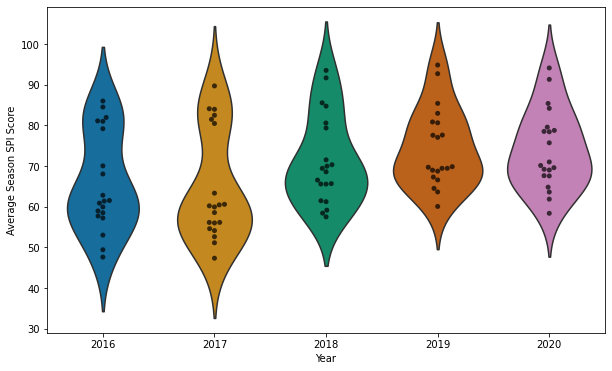

In [64]:
df_2020 = df[df['Year'] == 2020]

plt.figure(figsize=(10,6))
sns.violinplot(x='Year',
              y='Average Season SPI Score',
              data=df,
              inner=None,
              palette= 'colorblind')

sns.swarmplot(x='Year',
              y='Average Season SPI Score',
              data=df,
              color='k',
              alpha=0.7)